In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import hvplot.pandas
from scipy.stats import linregress
from numpy.polynomial import Polynomial
import seaborn as sns

In [75]:
#Save hurricanes df to directory
hurricanes_df = pd.read_csv('Output_CSVs/hurricanes_df.csv')

#Save Merged df to directory
hpi_df = pd.read_csv('Output_CSVs/hpi_df.csv')

#Save clean df as CSV to directory
clean_hurricane_hpi_df = pd.read_csv('Output_CSVs/clean_hurricane_hpi_data.csv')
hpi_df.head()

,State,County,FIPS code,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,Year -1,Year +1,Year +2,Year +3,Annual Change (%) -1,Annual Change (%) +1,Annual Change (%) +2,Annual Change (%) +3,HPI -1,HPI +1,HPI +2,HPI +3
0,AL,Autauga,1001,1986,NaN,100.00,95.59,70.96,NaN,1987.0,1988.0,1989.0,NaN,-1.94,2.57,4.32,NaN,98.06,100.58,104.92
1,AL,Autauga,1001,1987,-1.94,98.06,93.74,69.59,1986.0,1988.0,1989.0,1990.0,NaN,2.57,4.32,-0.29,100.00,100.58,104.92,104.62
2,AL,Autauga,1001,1988,2.57,100.58,96.14,71.38,1987.0,1989.0,1990.0,1991.0,-1.94,4.32,-0.29,2.52,98.06,104.92,104.62,107.25
3,AL,Autauga,1001,1989,4.32,104.92,100.29,74.46,1988.0,1990.0,1991.0,1992.0,2.57,-0.29,2.52,3.09,100.58,104.62,107.25,110.57
4,AL,Autauga,1001,1990,-0.29,104.62,100.00,74.24,1989.0,1991.0,1992.0,1993.0,4.32,2.52,3.09,3.35,104.92,107.25,110.57,114.28


In [76]:
by_nation = hpi_df.groupby(['Year'])
change_by_nation = by_nation['Annual Change (%)'].agg(['mean','median'])
change_by_nation

,mean,median
Year,,
1975,NaN,NaN
1976,7.012998,7.490
1977,11.236533,10.670
1978,13.301912,13.600
1979,13.148394,12.480
1980,7.598505,7.450
1981,4.597900,5.010
1982,0.541563,0.950
1983,7.587261,5.725


In [77]:
by_state = hpi_df.groupby(['State','Year'])
change_by_state = by_state['Annual Change (%)'].agg(['mean','median'])
change_by_state

mean  median
State Year                   
AK    1975        NaN     NaN
      1976   7.550000   7.550
      1977   4.780000   4.780
      1978  11.830000  11.830
      1979  11.200000  11.200
...               ...     ...
WY    2019   3.885000   3.795
      2020   3.487727   3.625
      2021   9.633636   9.390
      2022  15.822727  15.125
      2023   4.909524   5.900

[2497 rows x 2 columns]

In [78]:
# First merge on 'Year' to include national data
merged_df = pd.merge(hpi_df, change_by_nation, on='Year', how='outer')

# Then merge on both 'Year' and 'State' to include state-level data
merged_df2 = pd.merge(merged_df, change_by_state, on=['Year', 'State'], how='outer')

# Rename columns for clarity
clean_merged = merged_df2.rename(columns={
    'mean_x': 'National Mean',
    'median_x': 'National Median',
    'mean_y': 'State Mean',
    'median_y': 'State Median'
})

# Display the cleaned merged DataFrame
clean_merged

,State,County,FIPS code,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,Year -1,Year +1,...,Annual Change (%) +2,Annual Change (%) +3,HPI -1,HPI +1,HPI +2,HPI +3,National Mean,National Median,State Mean,State Median
0,AK,Anchorage,2020,1975,NaN,100.00,56.05,38.81,2023.0,1976.0,...,9.52,8.93,288.26,109.25,119.65,130.33,NaN,NaN,NaN,NaN
1,AK,Fairbanks North Star,2090,1975,NaN,100.00,68.79,44.33,2023.0,1976.0,...,0.04,14.73,608.92,105.85,105.90,121.50,NaN,NaN,NaN,NaN
2,AL,Jefferson,1073,1975,NaN,100.00,47.95,32.53,2023.0,1976.0,...,9.94,11.49,330.46,108.90,119.73,133.49,NaN,NaN,NaN,NaN
3,AL,Lee,1081,1975,NaN,100.00,52.68,37.30,2023.0,1976.0,...,0.11,6.73,305.53,111.57,111.68,119.20,NaN,NaN,NaN,NaN
4,AL,Madison,1089,1975,NaN,100.00,39.81,33.06,2023.0,1976.0,...,11.16,5.39,169.70,110.27,122.58,129.18,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100427,WY,Sweetwater,56037,2023,6.56,673.62,343.66,237.06,2022.0,1986.0,...,-3.01,1.93,632.15,100.00,96.99,98.86,7.85995,7.63,4.909524,5.9
100428,WY,Teton,56039,2023,NaN,NaN,NaN,NaN,2022.0,1982.0,...,2.60,-1.63,1179.97,100.00,102.60,100.93,7.85995,7.63,4.909524,5.9
100429,WY,Uinta,56041,2023,2.77,361.18,521.19,297.72,2022.0,1992.0,...,7.61,8.63,351.46,100.00,107.61,116.89,7.85995,7.63,4.909524,5.9
100430,WY,Washakie,56043,2023,17.92,392.60,NaN,265.75,2022.0,1996.0,...,3.37,2.23,332.95,100.00,103.37,105.67,7.85995,7.63,4.909524,5.9


In [81]:
# Group by 'State' and 'Year' to calculate the mean of 'Annual Change (%)'
by_state = hpi_df_csv.groupby(['State', 'Year'])['Annual Change (%)'].mean().reset_index()

# Rename the column for clarity
change_by_state = by_state.rename(columns={'Annual Change (%)': 'Mean Annual Change (%)'})

# Display the resulting DataFrame
change_by_state

NameError: name 'hpi_df_csv' is not defined

In [82]:
prev_mean_state = []
mean_state_1 = []
mean_state_2 = []
mean_state_3 = []

for index in change_by_state.index:
    try:
        value2 = change_by_state.at[index-1]
        prev_mean_state.append(value2)
    except:
        prev_mean_state.append('')

for index in change_by_state.index:
    try:
        value2 = change_by_state.at[index+1,'mean']
        mean_state_1.append(value2)
    except:
        mean_state_1.append('')

for index in change_by_state.index:
    try:
        value2 = change_by_state.at[index+2,'mean']
        mean_state_2.append(value2)
    except:
        mean_state_2.append('')

for index in change_by_state.index:
    try:
        value2 = change_by_state.at[index+3,'mean']
        mean_state_3.append(value2)
    except:
        mean_state_3.append('')

change_by_state['State AC Mean -1'] = prev_mean_state
change_by_state['State AC Mean +1'] = mean_state_1
change_by_state['State AC Mean +2'] = mean_state_2
change_by_state['State AC Mean +3'] = mean_state_3
change_by_state

mean  median State AC Mean -1 State AC Mean +1  \
State Year                                                        
AK    1975        NaN     NaN                                     
      1976   7.550000   7.550                                     
      1977   4.780000   4.780                                     
      1978  11.830000  11.830                                     
      1979  11.200000  11.200                                     
...               ...     ...              ...              ...   
WY    2019   3.885000   3.795                                     
      2020   3.487727   3.625                                     
      2021   9.633636   9.390                                     
      2022  15.822727  15.125                                     
      2023   4.909524   5.900                                     

           State AC Mean +2 State AC Mean +3  
State Year                                    
AK    1975                                    
      1976                                    
      1977                                    
      1978                                    
      1979                                    
...                     ...              ...  
WY    2019                                    
      2020                                    
      2021                                    
      2022                                    
      2023                                    

[2497 rows x 6 columns]

In [83]:
print(clean_merged )

       State                County  FIPS code  Year  Annual Change (%)  \
0         AK             Anchorage       2020  1975                NaN   
1         AK  Fairbanks North Star       2090  1975                NaN   
2         AL             Jefferson       1073  1975                NaN   
3         AL                   Lee       1081  1975                NaN   
4         AL               Madison       1089  1975                NaN   
...      ...                   ...        ...   ...                ...   
100427    WY            Sweetwater      56037  2023               6.56   
100428    WY                 Teton      56039  2023                NaN   
100429    WY                 Uinta      56041  2023               2.77   
100430    WY              Washakie      56043  2023              17.92   
100431    WY                Weston      56045  2023              -1.17   

           HPI  HPI with 1990 base  HPI with 2000 base  Year -1  Year +1  ...  \
0       100.00               5

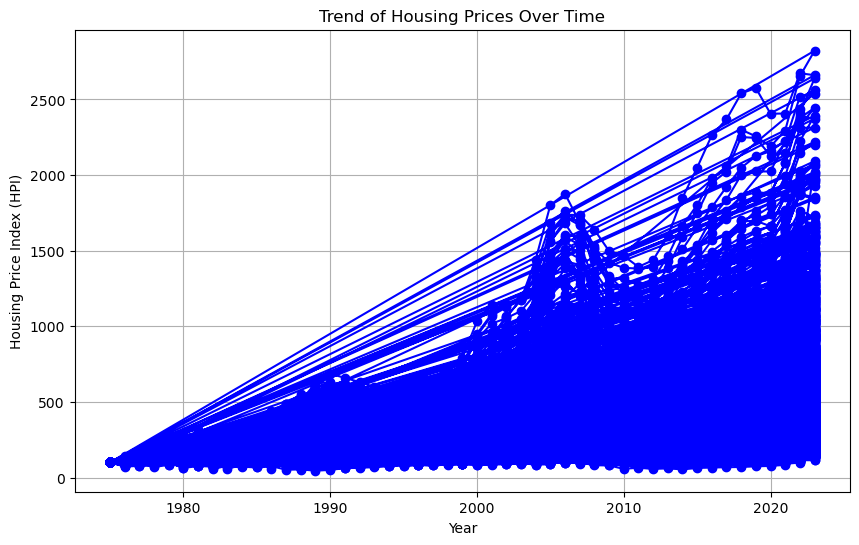

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(hpi_df['Year'], hpi_df['HPI'], marker='o', linestyle='-', color='b')
plt.title('Trend of Housing Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Housing Price Index (HPI)')
plt.grid()
plt.show()

In [85]:
hpi_df = hpi_df.dropna(subset=['Year', 'HPI'])

In [ ]:
print(hpi_df.dtypes)

In [87]:
# Convert 'Year' and 'HPI' to numeric using .loc
hpi_df.loc[:, 'Year'] = pd.to_numeric(hpi_df['Year'], errors='coerce')
hpi_df.loc[:, 'HPI'] = pd.to_numeric(hpi_df['HPI'], errors='coerce')

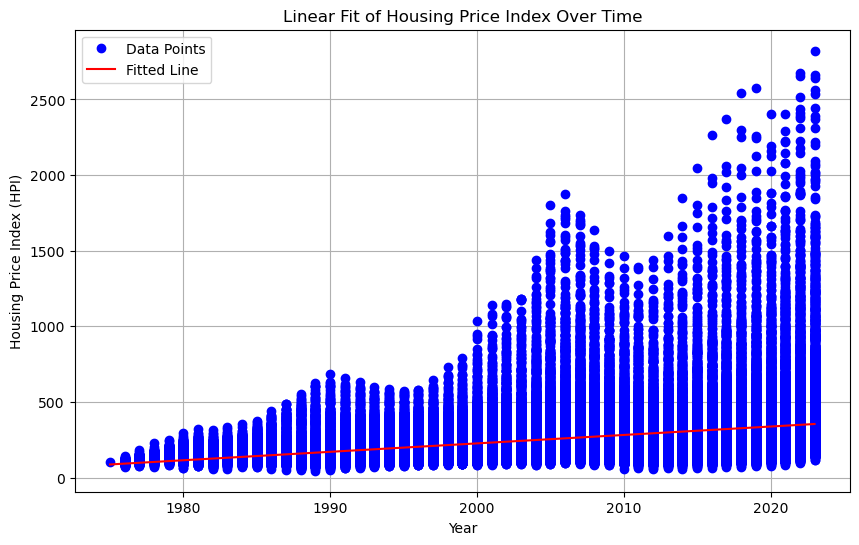

In [89]:
# Drop NaN values
hpi_df = hpi_df.dropna(subset=['Year', 'HPI'])

# Remove duplicates
hpi_df = hpi_df.drop_duplicates(subset=['Year', 'HPI'])

# Check if there are enough unique years
if len(hpi_df['Year'].unique()) < 2:
    print("Not enough unique years to fit a polynomial.")
else:
    # Fit a polynomial of degree 1 (linear)
    p = Polynomial.fit(hpi_df['Year'], hpi_df['HPI'], 1)

    # Generate x values for plotting the fitted line
    x = np.linspace(hpi_df['Year'].min(), hpi_df['Year'].max(), 100)

    # Calculate the corresponding y values using the polynomial
    y = p(x)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(hpi_df['Year'], hpi_df['HPI'], 'o', label='Data Points', color='b')
    plt.plot(x, y, '-', label='Fitted Line', color='r')
    plt.title('Linear Fit of Housing Price Index Over Time')
    plt.xlabel('Year')
    plt.ylabel('Housing Price Index (HPI)')
    plt.legend()
    plt.grid()
    plt.show()

NameError: name 'hurricane_years' is not defined

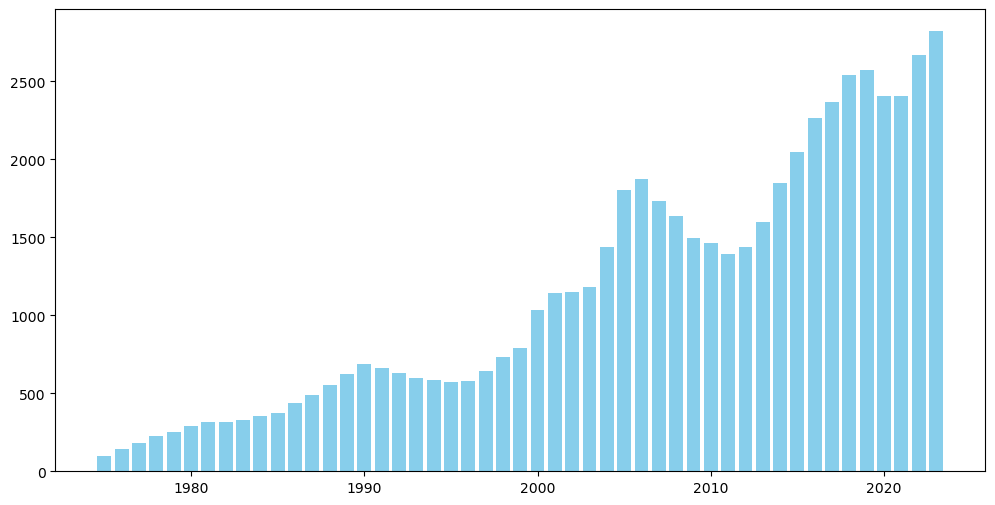

In [90]:
# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(hpi_df['Year'], hpi_df['HPI'], color='skyblue')

# Mark the hurricane years
for bar in bars:
    year = int(bar.get_x() + bar.get_width() / 2)  # Get the year from the bar's position
    if year in hurricane_years:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 'H', 
                 ha='center', va='bottom', color='red', fontsize=12)

plt.title('Housing Price Index (HPI) Over Years with Hurricane Years Marked')
plt.xlabel('Year')
plt.ylabel('Housing Price Index (HPI)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [65]:
clean_merged = clean_merged.dropna(subset=['Annual Change (%)', 'HPI'])

C:\Users\ayayloyan\AppData\Local\Temp\ipykernel_13928\450242960.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='County', y='Annual Change (%)', data=clean_merged, palette='viridis')


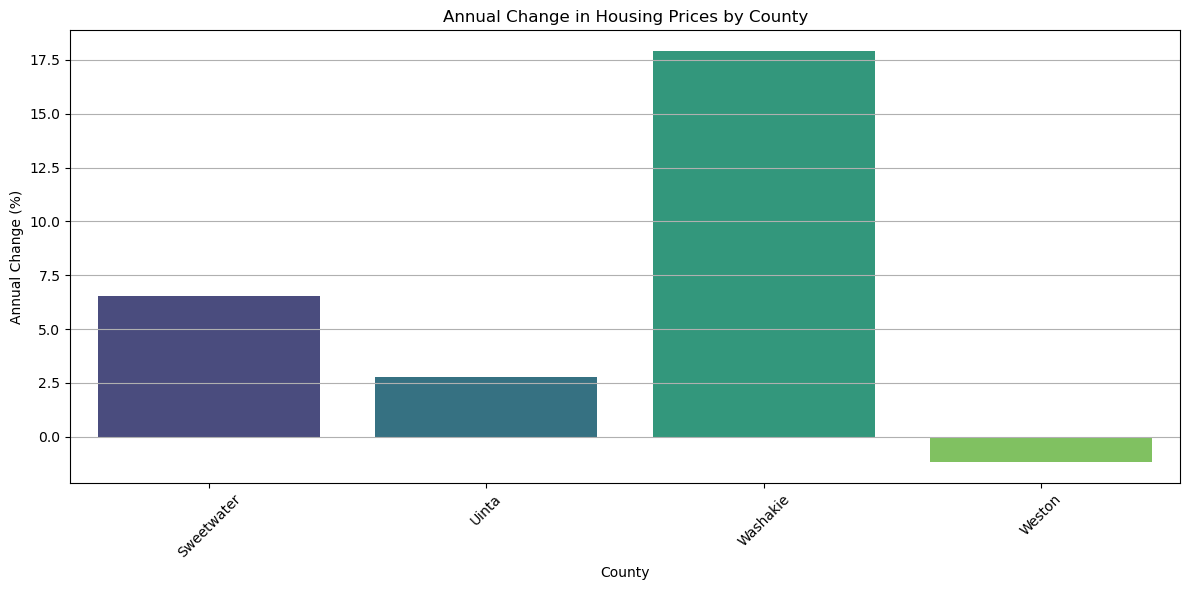

In [66]:
# Sample DataFrame creation (replace this with your actual DataFrame)
# clean_merged = pd.read_csv('your_data.csv')  # Load your data

# Sample data for demonstration
data = {
    'State': ['AK', 'AK', 'AL', 'AL', 'AL', 'WY', 'WY', 'WY', 'WY', 'WY'],
    'County': ['Anchorage', 'Fairbanks North Star', 'Jefferson', 'Lee', 'Madison', 
               'Sweetwater', 'Teton', 'Uinta', 'Washakie', 'Weston'],
    'FIPS code': [2020, 2090, 1073, 1081, 1089, 56037, 56039, 56041, 56043, 56045],
    'Year': [1975, 1975, 1975, 1975, 1975, 2023, 2023, 2023, 2023, 2023],
    'Annual Change (%)': [None, None, None, None, None, 6.56, None, 2.77, 17.92, -1.17],
    'HPI': [100.00, 100.00, 100.00, 100.00, 100.00, 673.62, None, 361.18, 392.60, 258.37]
}
clean_merged = pd.DataFrame(data)

# Remove rows with NaN values in relevant columns for visualization
clean_merged = clean_merged.dropna(subset=['Annual Change (%)', 'HPI'])

# Bar Plot for Annual Change by County
plt.figure(figsize=(12, 6))
sns.barplot(x='County', y='Annual Change (%)', data=clean_merged, palette='viridis')
plt.title('Annual Change in Housing Prices by County')
plt.xlabel('County')
plt.ylabel('Annual Change (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\ayayloyan\AppData\Local\Temp\ipykernel_13928\2136077104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='HPI', data=clean_merged, palette='pastel')


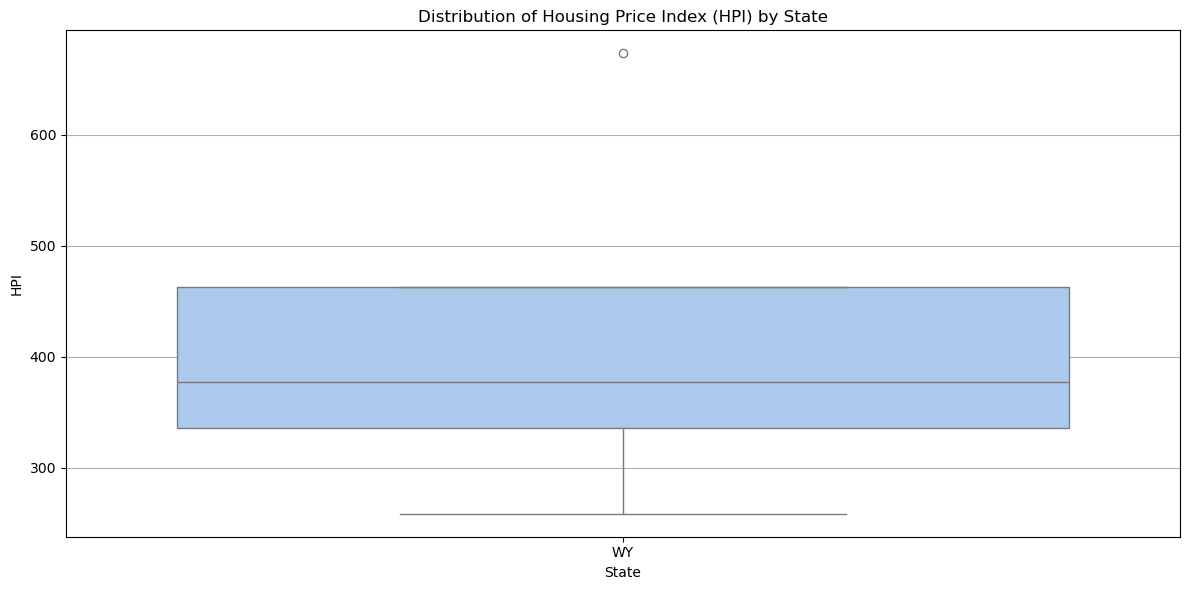

In [67]:
# Box Plot for HPI by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='HPI', data=clean_merged, palette='pastel')
plt.title('Distribution of Housing Price Index (HPI) by State')
plt.xlabel('State')
plt.ylabel('HPI')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

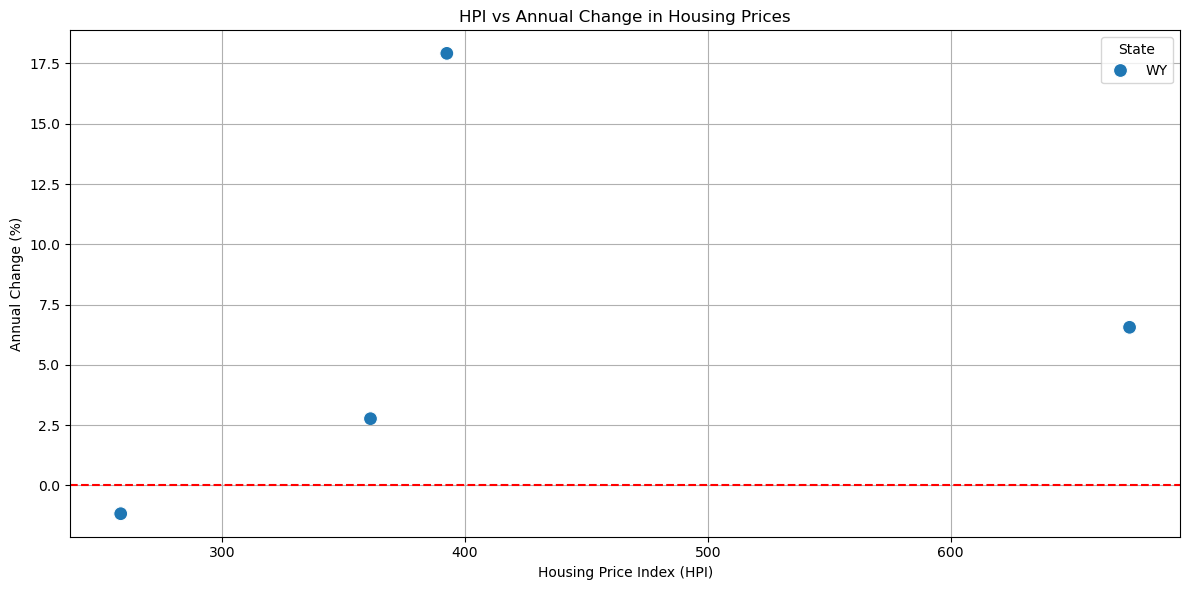

In [68]:
# 3. Scatter Plot for HPI vs Annual Change
plt.figure(figsize=(12, 6))
sns.scatterplot(x='HPI', y='Annual Change (%)', data=clean_merged, hue='State', style='State', s=100)
plt.title('HPI vs Annual Change in Housing Prices')
plt.xlabel('Housing Price Index (HPI)')
plt.ylabel('Annual Change (%)')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid()
plt.tight_layout()
plt.show()